In [25]:
import pandas as pd
import sqlalchemy
import mysql.connector
import seaborn
import seaborn as sns
import csv
import missingno as msno 
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import re
import matplotlib as mpl    
from matplotlib.patches import Patch


plt.style.use('seaborn')
sns.set_style('whitegrid')
%matplotlib inline



#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys  
data = pd.read_csv('/home/apprenant/Desktop/FARIZD/EDA/Data/ee654666-9d19-402e-9b80-5b70e4bcfe2d.csv')



#On peut ensuite importer le dossier comme un module


In [26]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [27]:
print(data.head())



   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

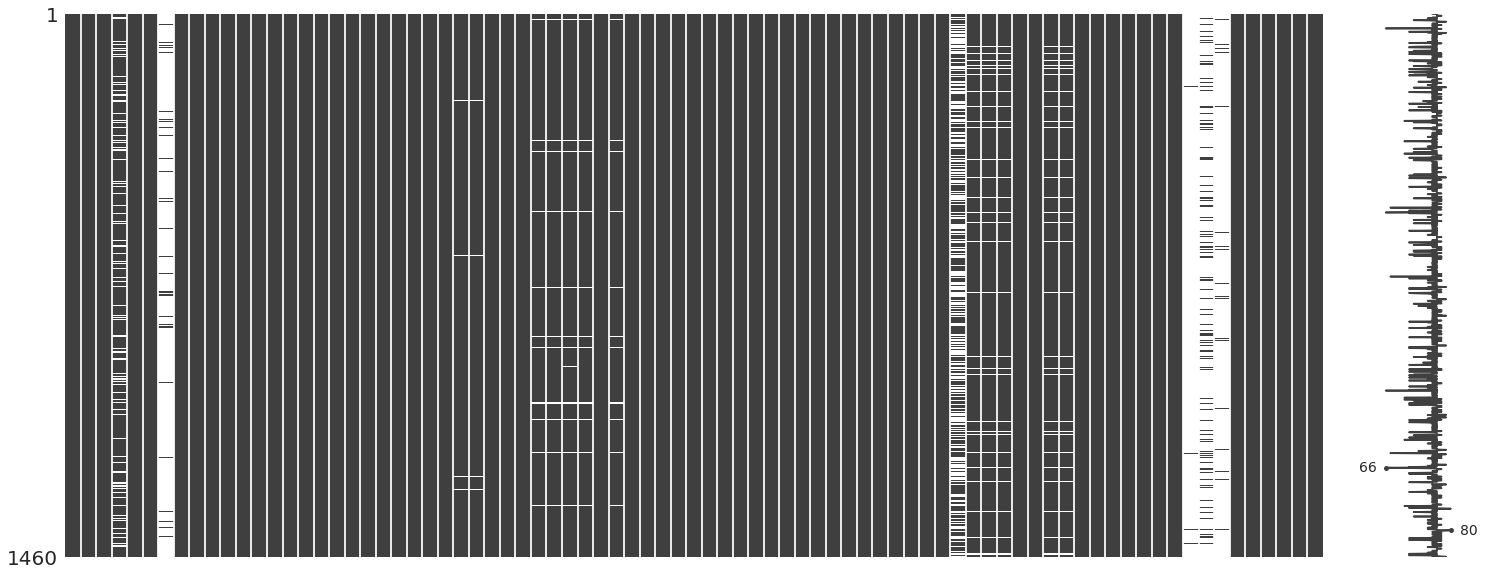

In [29]:
msno.matrix(data)

## Donnée plutot propre au niveau du remplissage des variables

In [30]:
def num_missing(x):
    return sum(x.isnull())

print(data.apply(num_missing, axis=0).values)

[   0    0    0  259    0    0 1369    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    8    8    0
    0    0   37   37   38   37    0   38    0    0    0    0    0    0
    1    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  690   81   81   81    0    0   81   81    0    0    0    0    0
    0    0 1453 1179 1406    0    0    0    0    0    0]


In [31]:
def num_missing(x):
    return sum(x.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(data.apply(num_missing, axis=0))

Valeurs manquantes par colonne:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [32]:
count_null = data.isnull().sum()/ data.shape[0] * 100
count_null

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

### Count_null me permet d'avoir les info en pourcentage des données manquantes 

In [33]:
#Empty Column >= 100%
null_col = count_null[count_null >= 31].index
null_col

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

### Grâce au pourcentage récuppérer cette ligne me permet d'avoir les noms de colonnes qui ont plus de 30% des données manquantes

In [34]:
data = data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1) 

### Je supprime donc les colonnes avec plus de 30% de données manquante  je verifie en dessous combien il me reste de colonnes 76 c'est correct car au début nous étions à 81

In [35]:
data.shape

(1460, 76)

In [36]:
data["SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/apprenant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Répartition du prix des maisons')

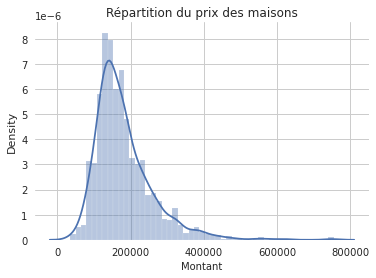

In [37]:
ax = sns.distplot(data["SalePrice"])
ax.set_xlabel(xlabel='Montant', size=10)
ax.set_title('Répartition du prix des maisons')





##Ce que le graphique nous indiques c'est que dans marché des biens immobiliers, il y a énormément de maison qui ont un prix de vente d'environ 180 k qui représente la moyenne 50% des maisons sont dans la fourchette de prix entre 130 k et 214k le graphique indique aussi que sont coeficient est positif.

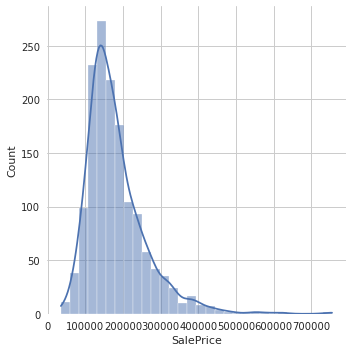

In [38]:
sns.displot(data["SalePrice"], bins= 30 , kde = True)

In [39]:
print(data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object


In [40]:
data = data.select_dtypes(include=[ 'int64','float64' ])

In [41]:
data.shape

(1460, 38)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

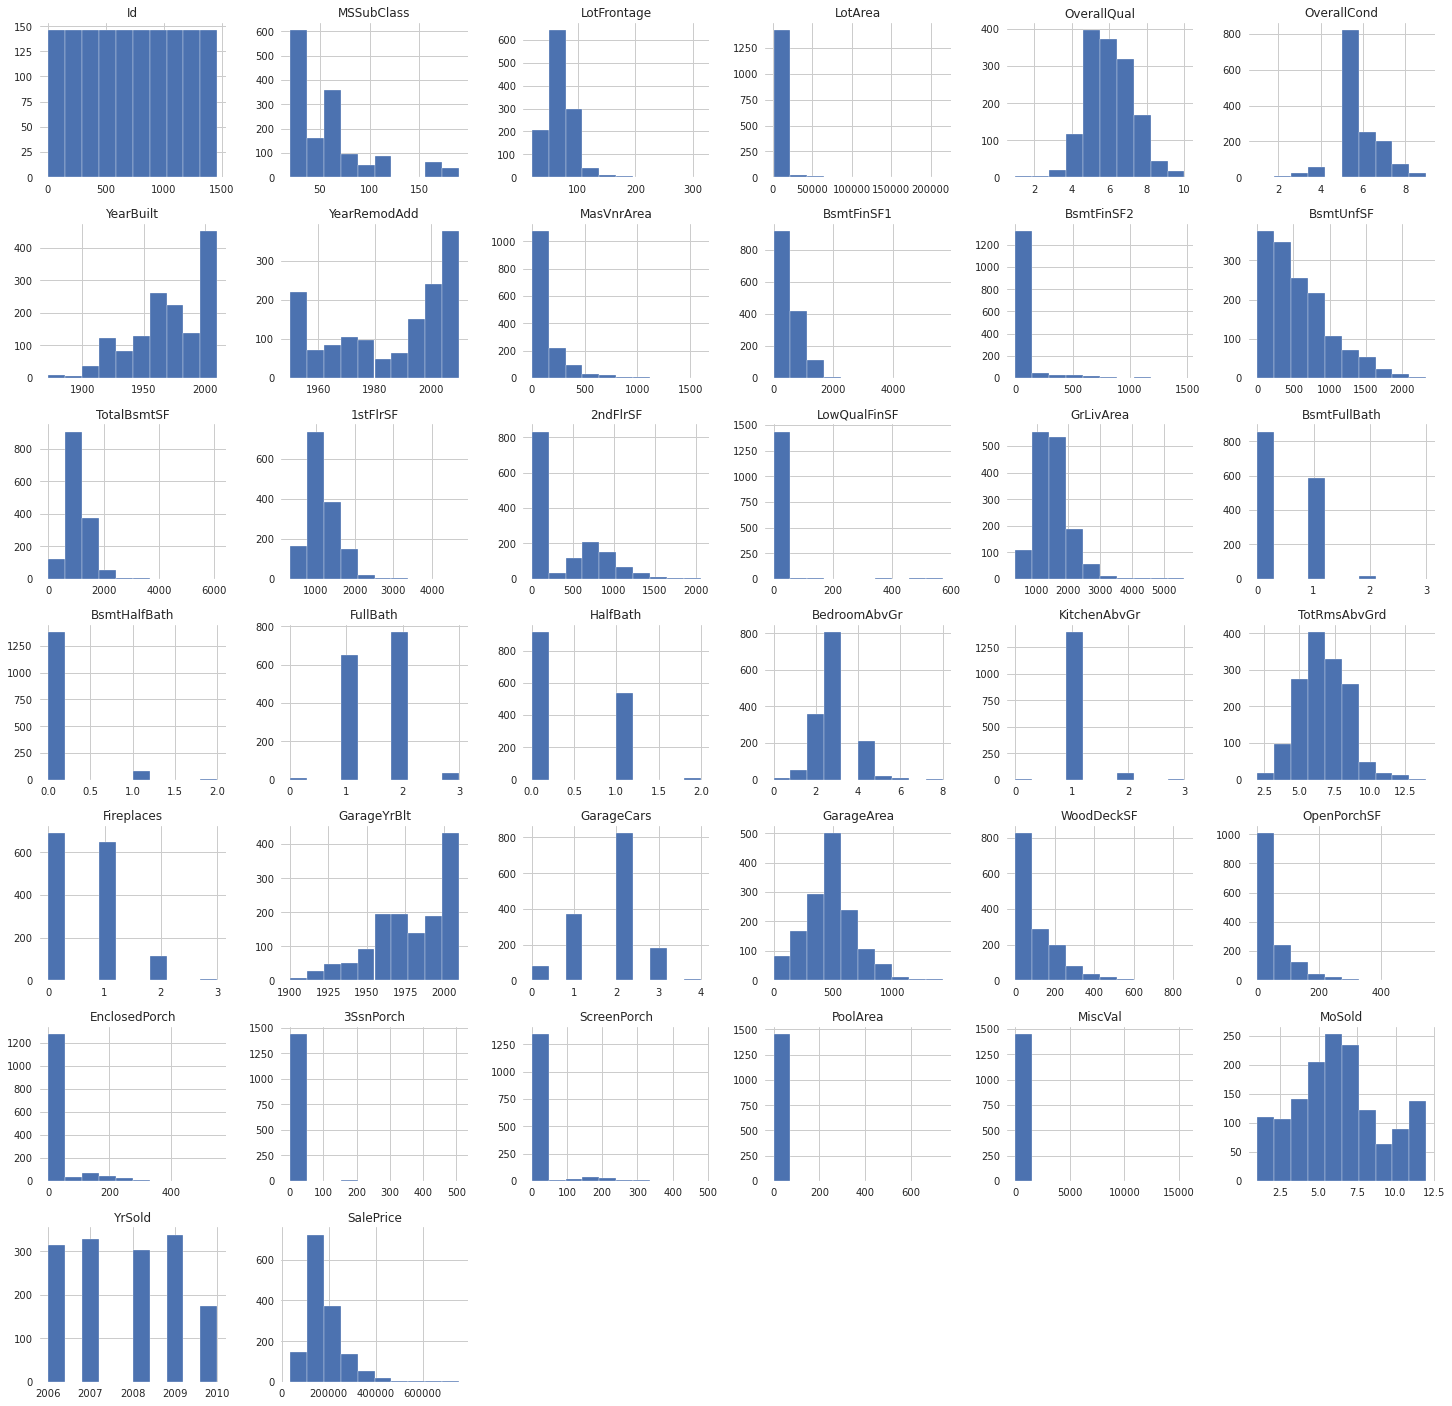

In [42]:
data.hist(figsize=(25,25))

<AxesSubplot:>

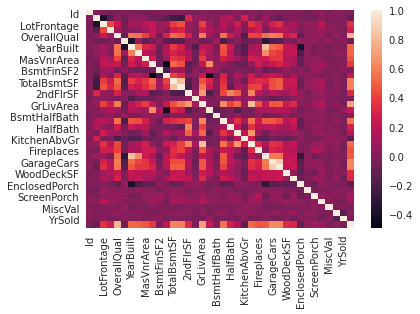

In [43]:
corr = data.corr()
sns.heatmap(corr)

In [44]:
print(corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #the top 15 values 
print('-----------------BREAK-------------- \n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:]) #bottom 5 values

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

-----------------BREAK-------------- 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [45]:
fl = data.select_dtypes(include=[ 'int64','float64' ])

In [49]:
sns.pairplot(fl)

KeyError: "['SalePrices'] not in index"

In [ ]:
sns.pairplot(corr, height=25)
